<a href="https://colab.research.google.com/github/ms7199/Airbnb-Booking-Analysis/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [1]:
#importing all the necessary liararies as per requirements of this project.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [114]:
airbnb_df = pd.read_csv("/content/drive/MyDrive/AlmaBetter /Team capstone project/EDA/Airbnb Bookings Analysis /Airbnb NYC 2019.csv") # load the dataset

In [8]:
airbnb_df.head() # print first few rows for getting overview of the dataset

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [38]:
# here we will cross check the number of total, numeric and categorical columns 
total_data = airbnb_df.shape[0]
total_cols = list(airbnb_df.columns) # all the caloumns name
numeric_cols=list(airbnb_df._get_numeric_data().columns) # numeric columns name
categorical_cols = list(set(total_cols)-set(numeric_cols)) # categorical colummns name
print(f"Total columns: {total_cols}")
print(f"Numeric columns: {numeric_cols}")
print(f"Categorical columns: {categorical_cols}")
print(f"The dataset has total {total_data} data and  {len(total_cols)} columns.\n{len(numeric_cols)} columns have numeric values and {len(categorical_cols)} columns have categorical values.")

Total columns: ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
Numeric columns: ['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
Categorical columns: ['neighbourhood', 'host_name', 'last_review', 'room_type', 'neighbourhood_group', 'name']
The dataset has total 48895 data and  16 columns.
10 columns have numeric values and 6 columns have categorical values.


In [9]:
airbnb_df.describe() # descriptive summary of all the numeric data columns

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [40]:
minimum_nights_gt_365 = airbnb_df[airbnb_df['minimum_nights']>365].sort_values('minimum_nights',ascending=False)
print(f"There are total {minimum_nights_gt_365.shape[0]} properties in which minimum nights stay required more then 365 nights")

There are total 14 properties in which minimum nights stay required more then 365 nights


In [39]:
print(f"There are total {len(airbnb_df[airbnb_df['price']==0])} properties where price is 0.")

There are total 11 properties where price is 0.


## **Observation**

---

*   The price for the property for staying is 0 dollar, which is not logically possible.
*   There are 14 properties in which minimum nights stay required more then 365 nights, which is unlikely possible



In [54]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [76]:
airbnb_df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [115]:
percentage_of_null_values_review_per_month = round((airbnb_df['reviews_per_month'].isna().sum()/airbnb_df.shape[0])*100, 2)
print(f"In this dataset {percentage_of_null_values_review_per_month}% rows have null values in review per month column.")

In this dataset 20.56% rows have null values in review per month column.


In [116]:
airbnb_df['reviews_per_month'] = airbnb_df['reviews_per_month'].fillna(0)
airbnb_df['last_review'] = airbnb_df['last_review'].fillna(0)

In [117]:
airbnb_df.isna().sum()

id                                 0
name                              16
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
last_review                        0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [50]:
airbnb_df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

## Observation
---

*   There are total 5 distinct neighbourhood groups
*   Manhattan has the highest properites of 21661 and Stalen Island has the lowest, which is 373 properties.



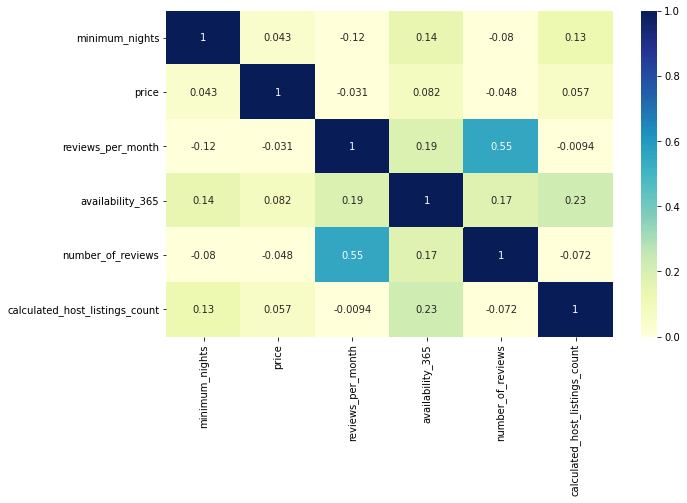

In [15]:
columns=list(set(airbnb_df.describe().columns) - {'latitude', 'longitude', 'id', 'host_id'}) # remove unwanted columns for correlation
numeric_data_corr = airbnb_df[columns].corr()
plt.figure(figsize=(10,6))
sns.heatmap(numeric_data_corr, annot= True, cmap="YlGnBu", vmin=0)
plt.show()

## Observation
---
*   correlation between `number_of_reviews` and `reviews_per_month` is highly positive.




In [109]:
reviews_by_areas = airbnb_df.groupby(['neighbourhood_group'])['number_of_reviews'].max().reset_index()
reviews_by_areas

,neighbourhood_group,number_of_reviews
0,Bronx,321
1,Brooklyn,488
2,Manhattan,607
3,Queens,629
4,Staten Island,333


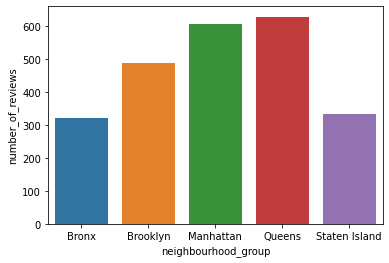

In [110]:
sns.barplot(data=reviews_by_areas, x='neighbourhood_group', y='number_of_reviews')
plt.show()

## Observation


*   Queens is the most reviewed area and on the other hand bronx is the least reviewed area 
*   Review count of Bronx is just few less then the review conut of Stane Island



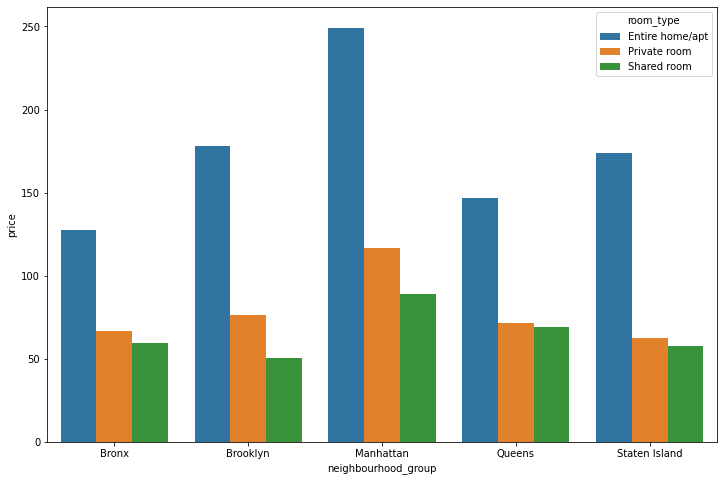

In [22]:
mean_price_neighbourhood_group = airbnb_df.groupby(["neighbourhood_group","room_type"],as_index=False)[['price']].mean()
plt.figure(figsize=(12,8))
sns.barplot(data= mean_price_neighbourhood_group, x='neighbourhood_group', y = "price",hue = "room_type")
plt.show()

## Observation
---

*   Manhattan and Brooklyn has the highest average room price, even Brooklyn and Stalen island is alomst same in this criteria but Stalen Island is at fewer lower side 
*   Avaerage Room price of Entire home/apt is much more then the remaining 2 types of rooms



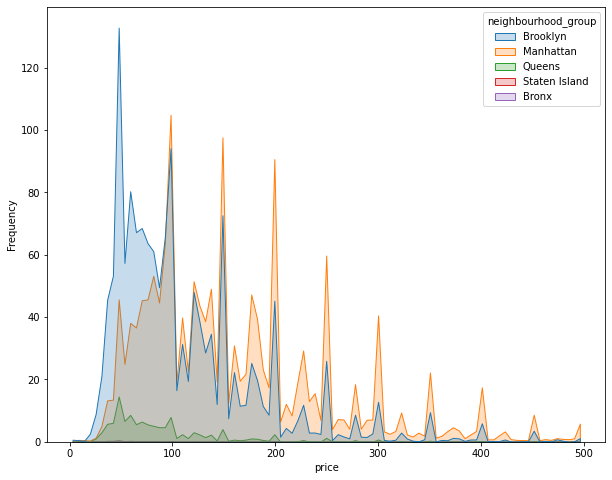

In [84]:
plt.figure(figsize=(10,8))
sns.histplot(data=airbnb_df[airbnb_df['price'] < 500], x ="price",hue= "neighbourhood_group",stat="frequency",element='poly') 
# took data which price were less then 500 dollars, because majority of the price is less then 500 dollars
plt.show()

## Observation
---

*   Manhattan and Brooklyn are the most busiest and costliest area among of all the areas.



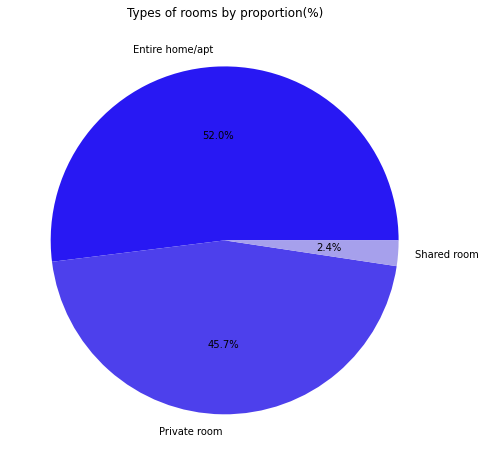

In [27]:
plt.figure(figsize=(10,8))
lables = airbnb_df["room_type"].value_counts().index
data = airbnb_df["room_type"].value_counts().values
plt.pie(data, labels = lables, autopct='%1.1f%%', colors = ['#2818F3','#4D40EC','#A6A0EC'])
plt.title("Types of rooms by proportion(%)")
plt.show()

## Observation
---

*   More then half of rooms are Entire home/apt type 
*   shared room has only 2.4%



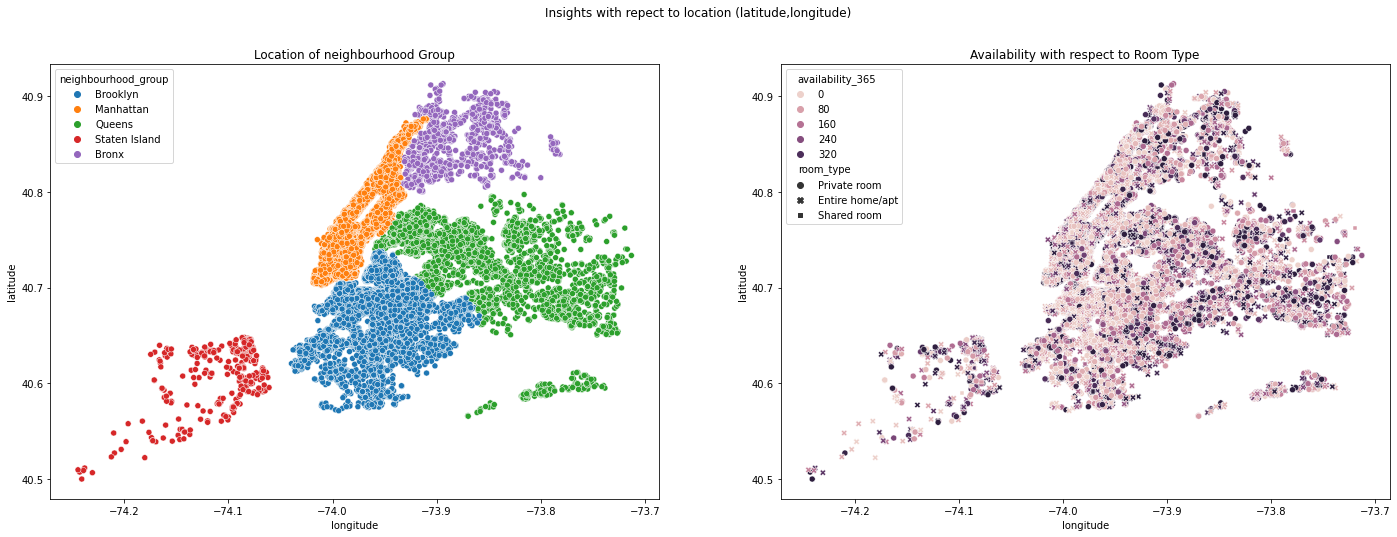

In [112]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(24,8))
fig.suptitle('Insights with repect to location (latitude,longitude)')
sns.scatterplot(data=airbnb_df, x = "longitude", y = "latitude",hue ="neighbourhood_group",ax=axes[0])
axes[0].set_title("Location of neighbourhood Group")
sns.scatterplot(data=airbnb_df, x = "longitude", y = "latitude",hue ="availability_365",style="room_type",ax=axes[1])
axes[1].set_title("Availability with respect to Room Type")
plt.show()

## Observation
---

*   From the first chart, a clear visualization of neighbourhood location of New York city with repect to our given data. 
*   From the socend chart, tried to visualize the availability with respect to Room Types. we can say that data is mostly equally distributed, but on the top off the central part of the is the city busiest.



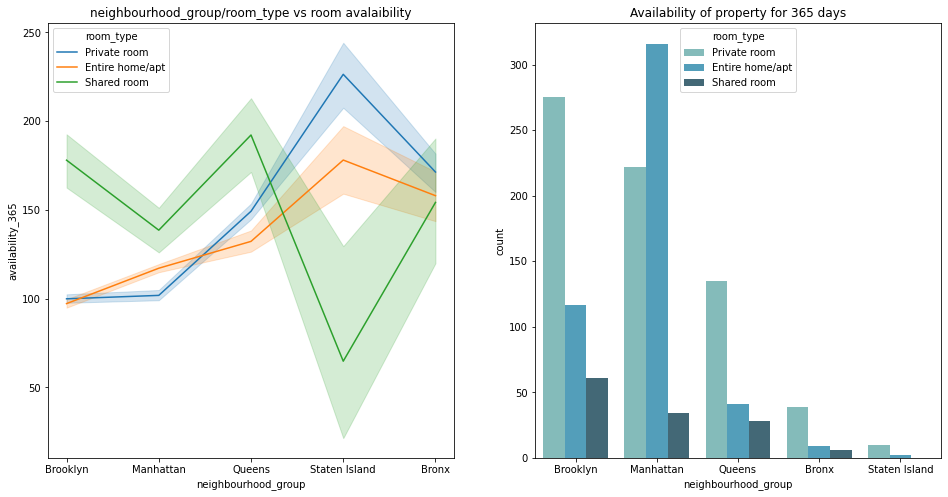

In [36]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(16,8))
sns.lineplot(data=airbnb_df,x='neighbourhood_group',y='availability_365',hue='room_type',ax=axes[0])
axes[0].set_title("neighbourhood_group/room_type vs room avalaibility")
sns.countplot(data=airbnb_df[airbnb_df['availability_365']==365],x='neighbourhood_group',hue='room_type', palette='GnBu_d',ax=axes[1])
axes[1].set_title("Availability of property for 365 days")
plt.show()

## Observation


*   From the fisrst chart, Stalen Island is the busiest shared room and also most available in Shared room.Other two types of rooms follo the same pattern for all the neighbourhood.

*   From the second chart, Manhattan is the most avalable Entire home/apt for 365 days.



# **Overall Observation/Conclusion:**
---


*   There are total 11 properties where price is 0. Which is lofically not acceplble. 
*   Manthatan is the most costliest location.
* Majority of guest prefer private room or entire room instead of shared rooms.
* `number_of_reviews` and `reviews_per_month` have highly positive correlation.

